In [177]:
import pandas as pd
import numpy as np
import re
import tokenize
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import requests
import json
from tensorflow.keras.preprocessing.text import tokenizer_from_json
import matplotlib.pyplot as plt

In [116]:
df = pd.read_csv('../datasets/0.csv')
df_text = np.array(df['text'])
df_label = np.array(df['label'])

In [117]:
df_user = []
personality_types = ['intj', 'intp', 'entp', 'entj', 'infj', 'infp', 'enfj', 'enfp', 'istj', 'isfj', 'estj', 'esfj', 'istp', 'isfp', 'estp', 'esfp']

In [118]:
# resp = requests.get("http://www.netlingo.com/acronyms.php")
# soup = BeautifulSoup(resp.text, "html.parser")
# slangdict= {}
# key=""
# value=""

In [119]:
# for div in soup.findAll('div', attrs={'class':'list_box3'}):
#     for li in div.findAll('li'):
#         for a in li.findAll('a'):
#             key =a.text
#             value = li.text.split(key)[1]
#             slangdict[key]=value

# with open('myslang.json', 'w') as f:
#     json.dump(slangdict, f, indent=2)

In [120]:
for i in df_text:
  text = i.lower()
  text = re.sub(r'http\S+', '', text)
  text = re.sub(r'https\S+', '', text)
  text = re.sub(r'@[A-Za-z0-9]+','', text)
  for j in personality_types:
    text = re.sub(j, '', text)
  while True:
    before_text = text
    text=text.replace('  ', ' ')
    if before_text == text:
      break
  df_user.append(np.array(text.split('|||')))

In [121]:
df_user = np.array(df_user)

/var/folders/6m/2wgdj6_s0rbd4wl3f0gy7kkh0000gq/T/ipykernel_80242/856064120.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  df_user = np.array(df_user)


In [122]:
df_user_flattened = []
df_label_flattened = []

In [123]:
for index, i in enumerate(df_user):
  for j in i:
    df_user_flattened.append(j)
    df_label_flattened.append(df_label[index])

In [124]:
df_user_flattened = np.array(df_user_flattened)

In [132]:
seed = 23
np.random.seed = seed
ds_df = pd.DataFrame()
ds_df['posts']=df_user_flattened
ds_df['labels'] = df_label_flattened
ds = ds_df.to_numpy()
np.random.shuffle(ds)
front_cutoff = int(ds.shape[0]*0.6)
mid_cutoff = int(ds.shape[0]*0.8)
ds_train, ds_val, ds_test = ds[:front_cutoff], ds[front_cutoff:mid_cutoff], ds[mid_cutoff:]
ds_train


array([['if i want to enjoy life more then what other types or aspects of type should i try to develop in myself? for instance, should i somehow try to develop more s? in essence what i want is to break...',
        0],
       ["i'm not referring to my gender preference. i'm saying that no individual of any gender appeals besides him.",
        0],
       ["i've actually said these exact words once. i'm a daily smoker, which gives some people the idea that i'm lazy, lethargic, and incompetent. but actually, i'm functioning rather fine. i'm going to...",
        0],
       ...,
       ["your problem is that you're trying to emulate other types. play the cards you actually have; 's are infamously the most romantic type and it shows. i used to feel the same way, then with time i...",
        0],
       ["i just started a relationship with an girl, and i am . first of all, i love it so far. im used to and so this is a real relief. regarding affection, she's so closed off. if i...",
       

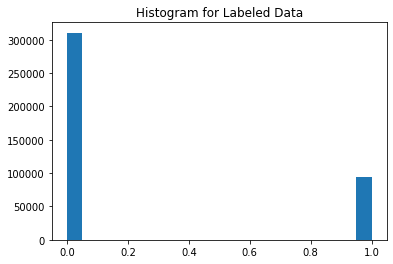

In [180]:
_ = plt.hist(df_label_flattened, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram for Labeled Data")
plt.show()

In [133]:
ds_train.shape

(243157, 2)

In [137]:
ds_train_texts, ds_train_labels = ds_train[:,0], ds_train[:,1]

In [138]:
ds_val_texts, ds_val_labels = ds_val[:, 0], ds_val[:, 1]

In [139]:
ds_test_texts, ds_test_labels = ds_test[:, 0], ds_test[:, 1]

In [67]:
vocab_size = 4000 

oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words = vocab_size
                      ,oov_token= oov_tok
                      )
tokenizer.fit_on_texts(ds_train_texts)
word_index = tokenizer.word_index

In [68]:
word_index

In [70]:
# Save tokenizer to json
tokenizer_json = tokenizer.to_json()
with open('tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))

In [71]:
# load in tokenizer
with open('tokenizer.json') as f:
    data = json.load(f)
    tokenizer = tokenizer_from_json(data)

In [72]:
word_index = tokenizer.word_index
word_index

{'<OOV>': 1,
 'i': 2,
 'the': 3,
 'to': 4,
 'a': 5,
 'and': 6,
 'of': 7,
 'you': 8,
 'that': 9,
 'it': 10,
 'is': 11,
 'in': 12,
 'my': 13,
 'but': 14,
 'for': 15,
 'have': 16,
 'with': 17,
 'me': 18,
 'this': 19,
 "i'm": 20,
 'be': 21,
 'not': 22,
 'are': 23,
 'like': 24,
 'on': 25,
 'an': 26,
 'as': 27,
 'so': 28,
 'was': 29,
 'if': 30,
 'just': 31,
 'or': 32,
 'do': 33,
 'what': 34,
 'about': 35,
 'think': 36,
 "don't": 37,
 'people': 38,
 'when': 39,
 'your': 40,
 "it's": 41,
 'at': 42,
 'all': 43,
 'can': 44,
 'know': 45,
 'one': 46,
 'they': 47,
 'really': 48,
 'more': 49,
 'would': 50,
 'we': 51,
 'how': 52,
 'out': 53,
 'because': 54,
 'get': 55,
 'am': 56,
 'from': 57,
 "i've": 58,
 'some': 59,
 'time': 60,
 'he': 61,
 'up': 62,
 'very': 63,
 'there': 64,
 'no': 65,
 's': 66,
 'them': 67,
 'who': 68,
 'feel': 69,
 'much': 70,
 'well': 71,
 'being': 72,
 'too': 73,
 'been': 74,
 'by': 75,
 'love': 76,
 'good': 77,
 'things': 78,
 'say': 79,
 'other': 80,
 'want': 81,
 'way': 82

In [73]:
tokenized_train = tokenizer.texts_to_sequences(ds_train_texts)

In [75]:
tokenized_val = tokenizer.texts_to_sequences(ds_val_texts)

In [140]:
tokenized_test = tokenizer.texts_to_sequences(ds_test_texts)

In [76]:
padded = pad_sequences(tokenized_train, maxlen=150, padding='post', truncating='post')

In [77]:
padded.shape

(243157, 150)

In [78]:
padded_val = pad_sequences(tokenized_val, maxlen=150, padding='post', truncating='post')

In [141]:
padded_test = pad_sequences(tokenized_test, maxlen=150, padding='post', truncating='post')

In [82]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(4000, 16, input_length=150),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, return_sequences=True)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

learning_rate = 0.0001
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate), metrics=['accuracy', 'mse', 'mae', 'mape'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 150, 16)           64000     
_________________________________________________________________
bidirectional_10 (Bidirectio (None, 150, 32)           4224      
_________________________________________________________________
dropout_15 (Dropout)         (None, 150, 32)           0         
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 32)                6272      
_________________________________________________________________
dropout_16 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 264       
_________________________________________________________________
dropout_17 (Dropout)         (None, 8)                

In [83]:
model.fit(x=padded, y=np.asarray(ds_train_labels).astype('float32'), batch_size=8, epochs=5, validation_data=(padded_val, np.asarray(ds_val_labels).astype('float32')))

Epoch 1/5
30395/30395 [==============================] - 3368s 111ms/step - loss: 0.5511 - accuracy: 0.7669 - mse: 0.1823 - mae: 0.3662 - mape: 192000984.7780 - val_loss: 0.5412 - val_accuracy: 0.7657 - val_mse: 0.1781 - val_mae: 0.3399 - val_mape: 156226560.0000
Epoch 2/5
30395/30395 [==============================] - 5146s 169ms/step - loss: 0.5379 - accuracy: 0.7659 - mse: 0.1771 - mae: 0.3556 - mape: 181249941.0486 - val_loss: 0.5371 - val_accuracy: 0.7657 - val_mse: 0.1767 - val_mae: 0.3547 - val_mape: 178648384.0000
Epoch 3/5
30395/30395 [==============================] - 2724s 90ms/step - loss: 0.5305 - accuracy: 0.7684 - mse: 0.1741 - mae: 0.3500 - mape: 178211269.8192 - val_loss: 0.5384 - val_accuracy: 0.7657 - val_mse: 0.1772 - val_mae: 0.3614 - val_mape: 189144192.0000
Epoch 4/5
30395/30395 [==============================] - 4595s 151ms/step - loss: 0.5303 - accuracy: 0.7655 - mse: 0.1743 - mae: 0.3501 - mape: 177314560.3795 - val_loss: 0.5392 - val_accuracy: 0.7657 - val_ms

In [143]:
predictions = model.predict(padded_test)

In [145]:
print(np.mean(predictions))

0.22614066


In [153]:
labels_test = np.asarray(ds_test_labels).astype('float32')

In [147]:
rmse=np.sqrt(np.mean(((predictions - labels_test)**2)))

In [148]:
print(rmse)

0.43168423


In [154]:
model.evaluate(predictions, labels_test)

2533/2533 [==============================] - 7s 2ms/step - loss: 0.5626 - accuracy: 0.7651 - mse: 0.1869 - mae: 0.4043 - mape: 244507056.0000


[0.5625528693199158,
 0.7651042938232422,
 0.18689122796058655,
 0.40433382987976074,
 244507056.0]

In [174]:
# check number of correct predictions
count = 0.0
correct = 0.0
for i in range(len(predictions)):
    predict = 0
    if predictions[i] < 0.5:
        predict = 0
    else:
        predict = 1
    if predict == labels_test[i]:
        correct += 1.0
    
    count += 1.0

print('test accuracy: ' + str(correct/count*100) +'%')

test accuracy: 76.50426264296202%


In [172]:
num_pos = 0
index_pos = []
index_correct_pos = []
for i in range(len(predictions)):
    if predictions[i] >= 0.5:
        num_pos += 1
        index_pos.append(i)
        if labels_test[i] == 1.0:
            index_correct_pos.append(i)
            
print('number of positive predictions: ' + str(num_pos))
print('\nindices of positive predictions:')
print(index_pos)
print('\nindices of correct positive predictions:')
print(index_correct_pos)

number of positive predictions: 125

indices of positive predictions:
[524, 698, 986, 1367, 2766, 3834, 5183, 5817, 5920, 7801, 7957, 9722, 10273, 10472, 12069, 14150, 15378, 16681, 17795, 17797, 17868, 18603, 19804, 20534, 20835, 21738, 21767, 22083, 22650, 22819, 22965, 23655, 25123, 28069, 28670, 28731, 29747, 30038, 31044, 31954, 32388, 32669, 33716, 33966, 33976, 36077, 36294, 36935, 37216, 38093, 38231, 38922, 39228, 39645, 39902, 40392, 41708, 41935, 43202, 45416, 46262, 47024, 47206, 47322, 47798, 48050, 49093, 49362, 49583, 50414, 50517, 51056, 51280, 51866, 52005, 52233, 53121, 54471, 54909, 55677, 56169, 56598, 57158, 57345, 57727, 58106, 58385, 58782, 59439, 59661, 59838, 59986, 60124, 60479, 61242, 61372, 62517, 63030, 64617, 65396, 66385, 66551, 66896, 68632, 69251, 69961, 70813, 71743, 72373, 72896, 73658, 73665, 74598, 74652, 74836, 75253, 77236, 78181, 78841, 78908, 78925, 79375, 79446, 80285, 80304]

indices of correct positive predictions:
[524, 986, 2766, 3834, 5817

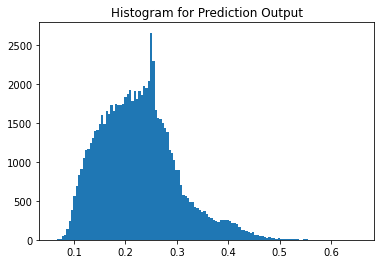

In [178]:
_ = plt.hist(predictions, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram for Prediction Output")
plt.show()